In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm, tqdm_notebook
from pathlib import Path
# pd.set_option('display.max_columns', 1000)
# pd.set_option('display.max_rows', 400)
sns.set()

os.chdir('..')

In [2]:
DATA = Path('data')
RAW  = DATA/'raw'
SUBMISSIONS = DATA/'submissions'

In [3]:
train      = pd.read_csv(RAW/'train_jqd04QH.csv', low_memory=False)
test       = pd.read_csv(RAW/'test_GYi4Gz5.csv', low_memory=False)
submission = pd.read_csv(RAW/'sample_submission_sxfcbdx.csv', low_memory=False)

In [4]:
id_col = 'enrollee_id'
cat_cols = ['city', 'gender', 'relevent_experience', 'enrolled_university', 
            'education_level', 'major_discipline', 'experience', 'company_size', 
            'company_type', 'last_new_job']
num_cols = ['city_development_index', 'training_hours']
target_col = 'target'

In [6]:
from src.utils import preprocess
preprocess(train, test, cat_cols, num_cols)

In [7]:
from sklearn.model_selection import StratifiedKFold
columns = list(train.drop([id_col, target_col], axis=1))
cat_indices = [i for i, col in enumerate(columns) if col in cat_cols]
kfolds = StratifiedKFold(n_splits=5, random_state=42)

# Neural Net

In [8]:
from src.utils import eval_neuralnet
from src.neuralnet import StructuredNet

In [18]:
%%time
USE_CUDA = True
trn_aucs, val_aucs = eval_neuralnet(
                train.drop([id_col, target_col], axis=1), 
                train[target_col], kfolds, cat_cols, num_cols, USE_CUDA)

Epoch: 1 | Train AUC: 63.01 | Val AUC: 63.10
Epoch: 2 | Train AUC: 64.73 | Val AUC: 65.41
Epoch: 3 | Train AUC: 65.45 | Val AUC: 66.08
Epoch: 4 | Train AUC: 66.11 | Val AUC: 66.50
Epoch: 5 | Train AUC: 66.54 | Val AUC: 66.89
Epoch: 6 | Train AUC: 66.73 | Val AUC: 66.77
Epoch: 7 | Train AUC: 66.92 | Val AUC: 66.59
Epoch: 8 | Train AUC: 67.19 | Val AUC: 67.13
Epoch: 9 | Train AUC: 67.60 | Val AUC: 67.33
Epoch: 10 | Train AUC: 67.75 | Val AUC: 67.39
Epoch: 11 | Train AUC: 67.96 | Val AUC: 67.66
Epoch: 12 | Train AUC: 68.06 | Val AUC: 67.77
Epoch: 13 | Train AUC: 68.24 | Val AUC: 67.83
Epoch: 14 | Train AUC: 68.46 | Val AUC: 68.09
Epoch: 15 | Train AUC: 68.42 | Val AUC: 67.70
Epoch: 16 | Train AUC: 68.60 | Val AUC: 68.02
Epoch: 17 | Train AUC: 68.88 | Val AUC: 68.04
Epoch: 18 | Train AUC: 68.89 | Val AUC: 67.94
Epoch: 19 | Train AUC: 69.13 | Val AUC: 68.04
Epoch: 20 | Train AUC: 69.28 | Val AUC: 68.04
Best epoch: 14 | Train AUC: 68.46 | Val AUC: 68.09

Epoch: 1 | Train AUC: 64.93 | Val AUC

In [19]:
# szs [300, 100] emb [20] lr [3e-4] e [20] emb_drop [0.4]
print_results(trn_aucs, val_aucs)

Train AUC: 69.15 +/- 1.73 | Val AUC: 66.63 +/- 2.51


In [17]:
# szs [300, 100] emb [20] lr [3e-4] e [20]
print_results(trn_aucs, val_aucs)

Train AUC: 70.40 +/- 1.63 | Val AUC: 66.38 +/- 2.32


In [12]:
# szs [300, 100] emb [20]
from src.utils import print_results
print_results(trn_aucs, val_aucs)

Train AUC: 69.61 +/- 1.93 | Val AUC: 66.48 +/- 2.79


In [10]:
# szs [300, 100]
from src.utils import print_results
print_results(trn_aucs, val_aucs)

Train AUC: 70.11 +/- 2.40 | Val AUC: 66.19 +/- 3.06


## OOF predictions

In [22]:
from src.oofpredictions import test_neuralnet

In [23]:
%%time
USE_CUDA = True
y_test, y_pred = test_neuralnet(
                train.drop([id_col, target_col], axis=1), 
                train[target_col], test.drop(id_col, axis=1),
                kfolds, cat_cols, num_cols, USE_CUDA)

Epoch: 1 | Train AUC: 64.26 | Val AUC: 64.41
Epoch: 2 | Train AUC: 65.86 | Val AUC: 66.26
Epoch: 3 | Train AUC: 66.01 | Val AUC: 66.45
Epoch: 4 | Train AUC: 66.59 | Val AUC: 66.86
Epoch: 5 | Train AUC: 67.08 | Val AUC: 67.29
Epoch: 6 | Train AUC: 67.43 | Val AUC: 67.58
Epoch: 7 | Train AUC: 67.79 | Val AUC: 68.08
Epoch: 8 | Train AUC: 67.95 | Val AUC: 67.88
Epoch: 9 | Train AUC: 68.25 | Val AUC: 68.30
Epoch: 10 | Train AUC: 68.51 | Val AUC: 68.51
Epoch: 11 | Train AUC: 68.74 | Val AUC: 68.40
Epoch: 12 | Train AUC: 68.70 | Val AUC: 68.27
Epoch: 13 | Train AUC: 69.15 | Val AUC: 68.49
Epoch: 14 | Train AUC: 69.24 | Val AUC: 68.40
Epoch: 15 | Train AUC: 69.48 | Val AUC: 68.46
Epoch: 16 | Train AUC: 69.80 | Val AUC: 68.58
Epoch: 17 | Train AUC: 69.94 | Val AUC: 68.59
Epoch: 18 | Train AUC: 70.15 | Val AUC: 68.33
Epoch: 19 | Train AUC: 70.26 | Val AUC: 68.43
Epoch: 20 | Train AUC: 70.29 | Val AUC: 68.44
Best epoch: 17 | Train AUC: 69.94 | Val AUC: 68.59

Epoch: 1 | Train AUC: 64.12 | Val AUC

In [24]:
val_results = pd.DataFrame()
tst_results = pd.DataFrame()

In [25]:
val_results['NeuralNet'] = y_pred
tst_results['NeuralNet'] = y_test

In [26]:
test[target_col] = y_test
submission = pd.read_csv(RAW/'sample_submission_sxfcbdx.csv', low_memory=False)
submission = pd.merge(submission[[id_col]], test[[id_col, target_col]], how='left', on=id_col)
submission.to_csv(SUBMISSIONS/'29-TunedNN_OOF.csv', index=False)

## All dataset

In [39]:
from src.neuralnet import StructuredNet, StructuredDataset, train_model, eval_model
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader

In [29]:
cat_szs = [int(train[col].max() + 1) for col in cat_cols]
emb_szs = [(c, min(20, (c+1)//2)) for c in cat_szs]

In [56]:
train_dl = DataLoader(StructuredDataset(
                        train[cat_cols], train[num_cols], train[target_col]),
                        batch_size=32, shuffle=True)
test_dl = DataLoader(StructuredDataset(
                        test[cat_cols], test[num_cols]),
                        batch_size=32)

In [57]:
model = StructuredNet(emb_szs, n_cont=len(num_cols), emb_drop=0.4,
                      szs=[300,100], drops=[0.5, 0.5])
if USE_CUDA: model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.BCEWithLogitsLoss()

In [58]:
%%time
train_model(model, train_dl, None, optimizer, criterion,
                    n_epochs=20, USE_CUDA=USE_CUDA)

Epoch: 1 | Train AUC: 64.36
Epoch: 2 | Train AUC: 66.08
Epoch: 3 | Train AUC: 66.43
Epoch: 4 | Train AUC: 66.85
Epoch: 5 | Train AUC: 67.16
Epoch: 6 | Train AUC: 67.46
Epoch: 7 | Train AUC: 67.71
Epoch: 8 | Train AUC: 67.87
Epoch: 9 | Train AUC: 68.23
Epoch: 10 | Train AUC: 68.31
Epoch: 11 | Train AUC: 68.64
Epoch: 12 | Train AUC: 68.82
Epoch: 13 | Train AUC: 68.87
Epoch: 14 | Train AUC: 69.05
Epoch: 15 | Train AUC: 69.28
Epoch: 16 | Train AUC: 69.44
Epoch: 17 | Train AUC: 69.59
Epoch: 18 | Train AUC: 69.77
Epoch: 19 | Train AUC: 69.99
Epoch: 20 | Train AUC: 70.03
CPU times: user 1min 18s, sys: 928 ms, total: 1min 19s
Wall time: 1min 22s


20

In [59]:
_, y_tst_pred = eval_model(model, test_dl, USE_CUDA=USE_CUDA)

In [45]:
test[target_col] = y_tst_pred
submission = pd.read_csv(RAW/'sample_submission_sxfcbdx.csv', low_memory=False)
submission = pd.merge(submission[[id_col]], test[[id_col, target_col]], how='left', on=id_col)
submission.to_csv(SUBMISSIONS/'30-TunedNN_AllDataset.csv', index=False)

In [50]:
test[target_col] = y_tst_pred
submission = pd.read_csv(RAW/'sample_submission_sxfcbdx.csv', low_memory=False)
submission = pd.merge(submission[[id_col]], test[[id_col, target_col]], how='left', on=id_col)
submission.to_csv(SUBMISSIONS/'31-TunedNN_AllDataset_15epochs.csv', index=False)

In [55]:
test[target_col] = y_tst_pred
submission = pd.read_csv(RAW/'sample_submission_sxfcbdx.csv', low_memory=False)
submission = pd.merge(submission[[id_col]], test[[id_col, target_col]], how='left', on=id_col)
submission.to_csv(SUBMISSIONS/'32-TunedNN_AllDataset_10epochs.csv', index=False)

In [60]:
test[target_col] = y_tst_pred
submission = pd.read_csv(RAW/'sample_submission_sxfcbdx.csv', low_memory=False)
submission = pd.merge(submission[[id_col]], test[[id_col, target_col]], how='left', on=id_col)
submission.to_csv(SUBMISSIONS/'33-TunedNN_AllDataset_20epochs.csv', index=False)

## Extract embeddings

In [74]:
emb_weights = {c: emb.weight.cpu().detach().numpy() for c, emb in zip(cat_cols, model.embs)}

In [78]:
for col in cat_cols:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)

In [86]:
X_train = np.hstack([[emb_weights[col][cat] for cat in train[col]] \
                     for col in cat_cols])
X_train = np.hstack([X_train, train[num_cols]])

In [89]:
X_test = np.hstack([[emb_weights[col][cat] for cat in test[col]] \
                     for col in cat_cols])
X_test = np.hstack([X_test, test[num_cols]])

In [90]:
X_train.shape, X_test.shape

((18359, 64), (15021, 64))

## LightGBM

In [91]:
from src.utils import eval_lgbm, print_results
import lightgbm as lgbm

In [99]:
%%time
# LGBMClassifier(n_estimators=1000, random_state=42, max_depth=5)
trn_aucs, val_aucs = eval_lgbm(lgbm, pd.DataFrame(X_train),
                     train[target_col], kfolds, 'auto')

No. estimators: 12 | Train AUC: 71.22 | Val AUC: 68.81
No. estimators: 21 | Train AUC: 74.26 | Val AUC: 64.55
No. estimators: 20 | Train AUC: 73.51 | Val AUC: 67.01
No. estimators: 85 | Train AUC: 81.79 | Val AUC: 66.68
No. estimators: 42 | Train AUC: 77.81 | Val AUC: 67.49

CPU times: user 5.92 s, sys: 56 ms, total: 5.98 s
Wall time: 1.66 s


In [94]:
# max_depth 5
print_results(trn_aucs, val_aucs)

Train AUC: 75.72 +/- 7.40 | Val AUC: 66.91 +/- 2.76


In [101]:
from sklearn.decomposition import PCA

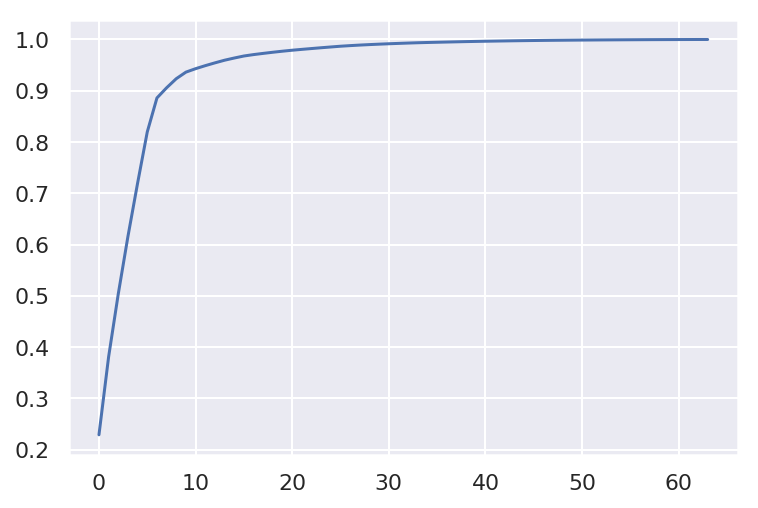

In [102]:
pca = PCA().fit(np.vstack([X_train, X_test]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [133]:
train_pca = pca.transform(X_train)[:,:21]
test_pca  = pca.transform(X_test)[:,:21]

In [134]:
%%time
trn_aucs, val_aucs = eval_lgbm(lgbm, pd.DataFrame(train_pca),
                     train[target_col], kfolds, 'auto')

No. estimators: 36 | Train AUC: 79.33 | Val AUC: 69.37
No. estimators: 86 | Train AUC: 85.35 | Val AUC: 65.56
No. estimators: 24 | Train AUC: 76.50 | Val AUC: 65.72
No. estimators: 21 | Train AUC: 76.00 | Val AUC: 67.54
No. estimators: 39 | Train AUC: 78.98 | Val AUC: 67.97

CPU times: user 3.81 s, sys: 28 ms, total: 3.84 s
Wall time: 845 ms


In [135]:
# max_depth 5 | 21 PCA components
print_results(trn_aucs, val_aucs)

Train AUC: 79.23 +/- 6.66 | Val AUC: 67.23 +/- 2.87


In [114]:
# max_depth 5 | 20 PCA components
print_results(trn_aucs, val_aucs)

Train AUC: 77.23 +/- 3.54 | Val AUC: 67.22 +/- 2.84


In [111]:
# max_depth 5 | 30 PCA components
print_results(trn_aucs, val_aucs)

Train AUC: 80.57 +/- 2.43 | Val AUC: 67.05 +/- 2.72


In [108]:
# max_depth 5 | 40 PCA components
print_results(trn_aucs, val_aucs)

Train AUC: 82.12 +/- 3.40 | Val AUC: 66.98 +/- 2.62


## Test LightGBM

In [136]:
from src.oofpredictions import test_lgbm

In [138]:
%%time
y_test, y_pred = test_lgbm(lgbm,
                    pd.DataFrame(train_pca), 
                    train[target_col], pd.DataFrame(test_pca),
                    kfolds, 'auto')

No. estimators: 36 | Train AUC: 79.33 | Val AUC: 69.37
No. estimators: 86 | Train AUC: 85.35 | Val AUC: 65.56
No. estimators: 24 | Train AUC: 76.50 | Val AUC: 65.72
No. estimators: 21 | Train AUC: 76.00 | Val AUC: 67.54
No. estimators: 39 | Train AUC: 78.98 | Val AUC: 67.97

Train AUC: 79.23 +/- 6.66 | Val AUC: 67.23 +/- 2.87

CPU times: user 5.33 s, sys: 32 ms, total: 5.36 s
Wall time: 1.55 s


In [139]:
val_results['LGBM'] = y_pred
tst_results['LGBM'] = y_test

In [141]:
test[target_col] = y_test
submission = pd.read_csv(RAW/'sample_submission_sxfcbdx.csv', low_memory=False)
submission = pd.merge(submission[[id_col]], test[[id_col, target_col]], how='left', on=id_col)
submission.to_csv(SUBMISSIONS/'34-PCA_LGBM_23c.csv', index=False)

## Test CatBoost

In [143]:
from src.utils import eval_catboost
from catboost import CatBoostClassifier

In [144]:
model = CatBoostClassifier()

In [145]:
%%time
trn_aucs, val_aucs = eval_catboost(CatBoostClassifier(iterations=1000, 
                        random_seed=42, eval_metric='AUC', od_pval=1e-3,
                        depth=7),
                    pd.DataFrame(train_pca), 
                    train[target_col], kfolds, None)

No. estimators: 110 | Train AUC: 75.04 | Val AUC: 69.67
No. estimators: 134 | Train AUC: 76.15 | Val AUC: 66.00
No. estimators: 135 | Train AUC: 76.32 | Val AUC: 66.61
No. estimators: 104 | Train AUC: 74.80 | Val AUC: 66.85
No. estimators: 265 | Train AUC: 80.52 | Val AUC: 68.65

CPU times: user 4min 39s, sys: 26.8 s, total: 5min 6s
Wall time: 35.1 s


In [146]:
# n_estimators 1000 | max_depth 7
print_results(trn_aucs, val_aucs)

Train AUC: 76.57 +/- 4.13 | Val AUC: 67.56 +/- 2.75


In [147]:
from src.oofpredictions import test_catboost

In [149]:
%%time
y_test, y_pred = test_catboost(CatBoostClassifier(iterations=1000, 
                        random_seed=42, eval_metric='AUC', od_pval=1e-3,
                        depth=7),
                    pd.DataFrame(train_pca), 
                    train[target_col], pd.DataFrame(test_pca),
                    kfolds, None)

No. estimators: 110 | Train AUC: 75.04 | Val AUC: 69.67
No. estimators: 134 | Train AUC: 76.15 | Val AUC: 66.00
No. estimators: 135 | Train AUC: 76.32 | Val AUC: 66.61
No. estimators: 104 | Train AUC: 74.80 | Val AUC: 66.85
No. estimators: 265 | Train AUC: 80.52 | Val AUC: 68.65

Train AUC: 76.57 +/- 4.13 | Val AUC: 67.56 +/- 2.75

CPU times: user 4min 37s, sys: 25.1 s, total: 5min 2s
Wall time: 34.6 s


In [150]:
val_results['CatBoost'] = y_pred
tst_results['CatBoost'] = y_test

In [151]:
test[target_col] = y_test
submission = pd.read_csv(RAW/'sample_submission_sxfcbdx.csv', low_memory=False)
submission = pd.merge(submission[[id_col]], test[[id_col, target_col]], how='left', on=id_col)
submission.to_csv(SUBMISSIONS/'35-PCA_CatBoost_23c.csv', index=False)